## Author : Khushboo Dhull
### Task 2 : Prediction using Unsupervised Machine Learning 
### GRIP @ The Sparks Foundation

## Problem Statement
In this K-means clustering task I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import datasets

### Reading the dataset

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
df1=df.copy()
df2=df.copy()

### Understanding the Dataset

In [6]:
df.shape

(150, 4)

In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(149, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


### Making Predictions

In [12]:
x = iris.data
y = iris.target

In [13]:
from sklearn.cluster import KMeans

WCSS
 [681.3706, 152.34795176035792, 78.85144142614601, 57.228473214285714, 46.44618205128205, 39.03998724608725, 34.62008318478907, 30.01439849624061, 27.86025908397476]


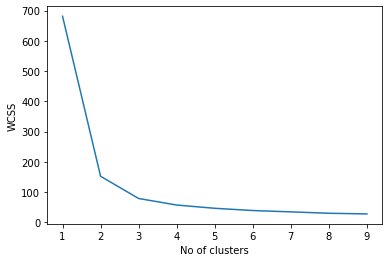

In [14]:
wcss = []
for i in range(1,10): # no of clusters
    m = KMeans(n_clusters=i)
    m.fit(x)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,10)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
for i in range(2,10):
    m=KMeans(n_clusters=i).fit(x)
    print(f'Silhouette Score at K={i}',silhouette_score(x,m.labels_))

Silhouette Score at K=2 0.6810461692117462
Silhouette Score at K=3 0.5528190123564094
Silhouette Score at K=4 0.49805050499728715
Silhouette Score at K=5 0.4887488870931052
Silhouette Score at K=6 0.36483400396700244
Silhouette Score at K=7 0.3588294450965687
Silhouette Score at K=8 0.3574536925852716
Silhouette Score at K=9 0.3200388990491543


- <b> Optimal value at K=2 as silhouette score highest and closest to 1. 
- <b>But as we know we have 3 different classes to separate in the iris data we should take K=3

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer

### At KMeans=2

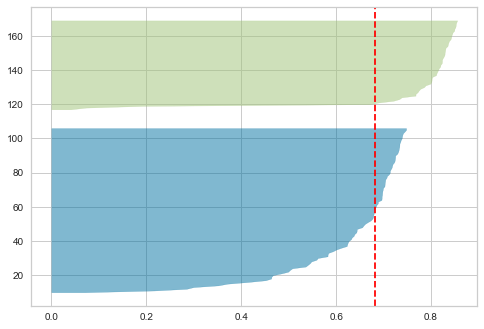

In [18]:
m2=KMeans(n_clusters=2)
visualizer=SilhouetteVisualizer(m2,colors='yellowbrick')
visualizer.fit(x)
plt.show()

In [19]:
from collections import Counter

In [20]:
ypred2=m2.predict(df)
c1=Counter(ypred2)
print(c1)

Counter({0: 96, 1: 53})


In [21]:
k2= KMeans(n_clusters=2)
k2.fit(x)
ypred2=k2.predict(x)
print(ypred2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [22]:
labels2= k2.labels_
print(labels2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [23]:
cent2= k2.cluster_centers_
print(cent2)

[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36981132 1.56037736 0.29056604]]


In [24]:
df1['Cls2']=ypred2
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cls2
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [25]:
res=df1.iloc[:,2:].groupby(['Cls2']).mean().T
res

Cls2,0,1
petal length (cm),4.958763,1.560377
petal width (cm),1.695876,0.290566


### At KMeans=3

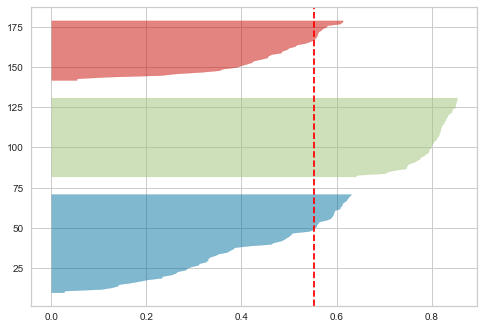

In [26]:
m3=KMeans(n_clusters=3)
visualizer=SilhouetteVisualizer(m3,colors='yellowbrick')
visualizer.fit(x)
plt.show()

In [27]:
ypred3=m3.predict(df)
c1=Counter(ypred3)
print(c1)

Counter({0: 61, 1: 50, 2: 38})


In [28]:
k3= KMeans(n_clusters=3)
k3.fit(x)
ypred3=k3.predict(x)
print(ypred3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [29]:
labels3= k3.labels_
print(labels3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [30]:
cent3= k3.cluster_centers_
print(cent3)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [31]:
df2['Cls3']=ypred3
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cls3
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
res=df2.iloc[:,2:].groupby(['Cls3']).mean().T
res

Cls3,0,1,2
petal length (cm),1.462,4.393548,5.742105
petal width (cm),0.246,1.433871,2.071053


### Visualization

In [33]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

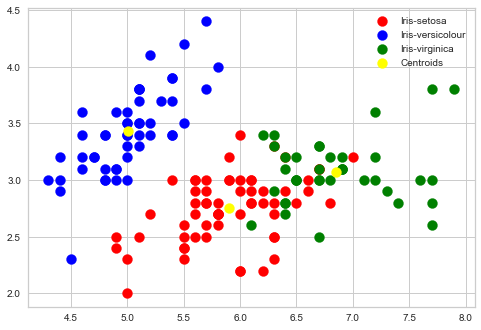

In [34]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()